let's try loading in our data.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# Show all columns (adjust to 1000 or higher if needed)
#pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap DataFrame across lines

In [ ]:
base_path_eli = "C:/Users/elisa/OneDrive/Desktop/"

# Load the CSV files
clinical_subset_dummy = pd.read_csv(base_path_eli + "clinical_subset_dummy.csv")
#clinical_subset_nodummy = pd.read_csv(base_path_eli + "clinical_subset_nodummy.csv")
gene_expression_only_breast = pd.read_csv(base_path_eli + "gene_expression_only_breast.csv")


## Regression

Now we will use three variables as our y: 
1. Binary Classification: OS (overall status), 'Alive': 0, 'Dead': 1
2. Binary Classification: Is_stage_12, 0 means stage 3 4 


We will model the analysis first using only Gene expression variables, and then we'll analyse the full dataset

In total we'll have 6 regressions 

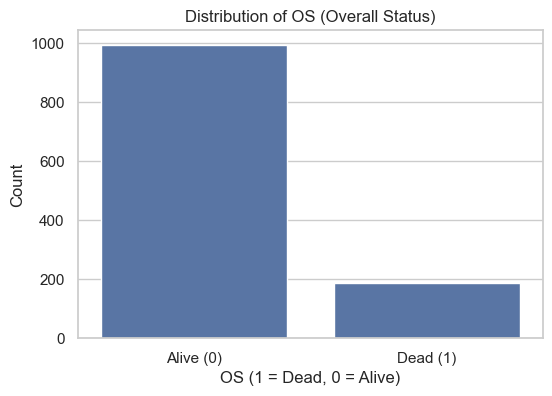

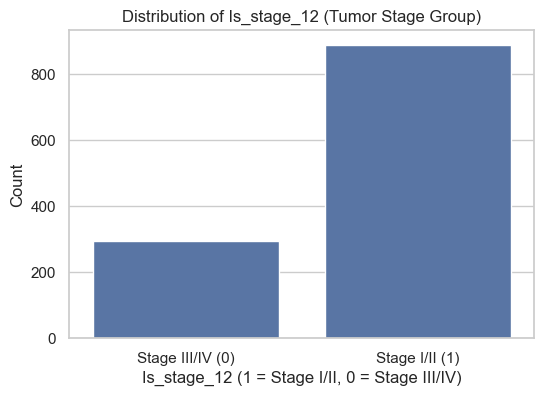

In [4]:
# Set visual style
sns.set(style="whitegrid")

# Plot OS distribution (1 = Dead, 0 = Alive)
plt.figure(figsize=(6, 4))
sns.countplot(x='OS', data=clinical_subset_dummy)
plt.title('Distribution of OS (Overall Status)')
plt.xlabel('OS (1 = Dead, 0 = Alive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Alive (0)', 'Dead (1)'])
plt.show()

# Plot Is_stage_12 distribution (1 = Stage I/II, 0 = Stage III/IV)
plt.figure(figsize=(6, 4))
sns.countplot(x='Is_stage_12', data=clinical_subset_dummy)
plt.title('Distribution of Is_stage_12 (Tumor Stage Group)')
plt.xlabel('Is_stage_12 (1 = Stage I/II, 0 = Stage III/IV)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stage III/IV (0)', 'Stage I/II (1)'])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Gene features
genes_only = breast_combined_df.loc[:, breast_combined_df.columns.str.startswith('ENSG')]

# ------------------------------------
# 1. is_alive — Logistic Regression (L1)
# ------------------------------------
X1 = genes_only
y1 = breast_combined_df['is_alive']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Scale and fit logistic regression with L1 penalty
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1_train)

clf1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, C=1.0)
clf1.fit(X1_scaled, y1_train)

# Get non-zero coefficients
selected_genes_1 = X1.columns[clf1.coef_[0] != 0]
print("1. Genes selected for is_alive (binary classification):")
print(selected_genes_1.tolist())


: 

: 

In [ ]:

# ------------------------------------
# 2. ajcc_pathologic_stage.diagnoses — Ordinal regression via Lasso
# ------------------------------------
stage_order = ['Stage I', 'Stage IA', 'Stage IB', 'Stage II', 'Stage IIA', 'Stage IIB',
               'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC', 'Stage IV']
mask2 = breast_combined_df['ajcc_pathologic_stage.diagnoses'].isin(stage_order)

X2 = genes_only[mask2]
y2 = breast_combined_df.loc[mask2, 'ajcc_pathologic_stage.diagnoses']
y2_encoded = OrdinalEncoder(categories=[stage_order]).fit_transform(y2.values.reshape(-1, 1)).ravel()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_encoded, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2_train)

lasso2 = Lasso(alpha=0.1)
lasso2.fit(X2_scaled, y2_train)

selected_genes_2 = X2.columns[lasso2.coef_ != 0]
print("\n2. Genes selected for AJCC pathologic stage (ordinal regression):")
print(selected_genes_2.tolist())



In [ ]:

# ------------------------------------
# 3. days_to_death — Lasso regression
# ------------------------------------
mask3 = breast_combined_df['days_to_death'].notna()
X3 = genes_only[mask3]
y3 = breast_combined_df.loc[mask3, 'days_to_death']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3_train)

lasso3 = Lasso(alpha=0.1)
lasso3.fit(X3_scaled, y3_train)

selected_genes_3 = X3.columns[lasso3.coef_ != 0]
print("\n3. Genes selected for days_to_death (continuous regression):")
print(selected_genes_3.tolist())